로지스틱회귀에서 특징변환의필요성


In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression as LR
%matplotlib inline
from matplotlib import pyplot as plt

X = np.random.random(size = 10).tolist() + (np.random.random(size = 10) + 1).tolist() + (np.random.random(size = 10) + 2).tolist()
Y = [0] * 9 + [1] * 1 + [0] * 2 + [1] * 8 + [0] * 9 + [1] * 1

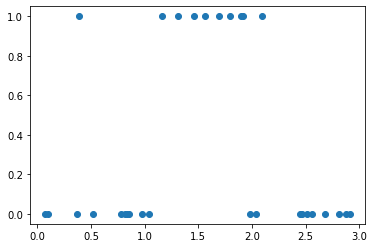

In [11]:
plt.scatter(X, Y)

In [12]:
X = np.array(X)
Y = np.array(Y)

cond = np.logical_and(X > 1, X <= 2)

X_tilda = X.copy()

# X_tilda = X => 사본이 아니라 view를 반환하기 때문. 
X_tilda[cond] = 1
X_tilda[~cond] = 0

In [13]:
model_1 = LR().fit(X.reshape(-1, 1), Y) # model_1: X를 특징을 그대로 사용한 모델
model_2 = LR().fit(X_tilda.reshape(-1, 1), Y) # model_2: 변환한 특징을 사용한 모델

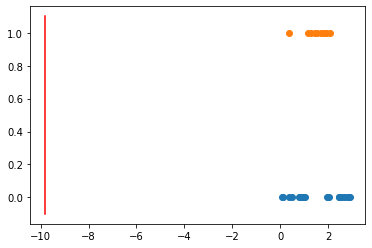

In [14]:
# decision boundary 유도
# Pr(y = 1 | x) >= 0.5
# <=> 1 / (1 + exp(-coef * x - intercept)) >= 0.5
# <=> (1 + exp(-coef * x - intercept)) <= 2
# <=> exp(-coef * x - intercept) <= 1
# <=> -coef * x - intercept <= 0
# <=> x >= - intercept / coef

decision_boundary = (- model_1.intercept_[0] / model_1.coef_[0])
plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], color = 'red')
plt.scatter(X[Y == 0], Y[Y == 0])
plt.scatter(X[Y == 1], Y[Y == 1])

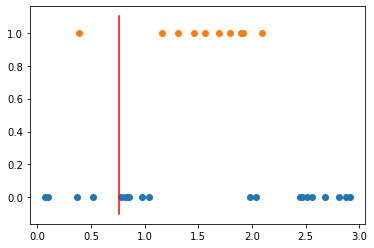

In [15]:
decision_boundary = (- model_2.intercept_[0] / model_2.coef_[0])
plt.plot([decision_boundary, decision_boundary], [-0.1, 1.1], color = 'red')
plt.scatter(X[Y == 0], Y[Y == 0])
plt.scatter(X[Y == 1], Y[Y == 1])